In [59]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))

$$
-\frac{d}{dx}\left[k(x)\frac{du}{dx}\right] = f(x)
$$

1. Обычная схема второго порядка

In [60]:
def k(x):
    return 0.5
def f(x):
    return x * (x <= 0.5) + 0.5 * (x > 0.5)
def u(x):
    return (- x ** 3 / 3. + 1. / 3. * x) * (x <= 0.5) + (- x ** 2 / 2. + 1. / 2. * x) * (x > 0.5)
    
n = 10 * 10 + 1
a = 0
b = 1
h = (b - a) / n
x = np.linspace(a, b, n + 1)
f_pred = np.zeros(n + 1)
for i in range(1, n):
    f_pred[i] = -(k(x[i] + h / 2) * (u(x[i + 1]) - u(x[i])) / h ** 2 - k(x[i] - h / 2) * (u(x[i]) - u(x[i - 1])) / h ** 2)
f_pred[-1] = 0.5
f_exact = f(x)
print(np.abs(f_pred - f_exact).max())

2.103960396039713


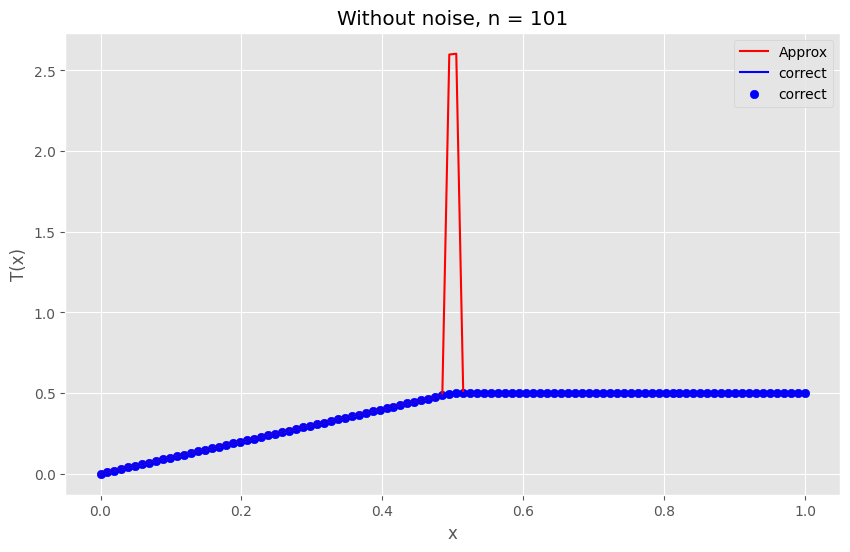

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(x, f_pred, color="red", label="Approx")
plt.plot(x, f_exact, color="blue", label="correct")
plt.scatter(x, f_exact, color="blue", label="correct")

plt.title(f"Without noise, n = {n}")
plt.xlabel("x")
plt.ylabel("T(x)")

plt.legend(loc='upper right')

plt.show()

2. Добавим случайный шум
$$
u_\epsilon(x) = u(x) + \epsilon \cdot 2 \cdot (\xi - 0.5), \quad  \xi \sim U[0, 1]
$$

In [62]:
def k(x):
    return 0.5
def f(x):
    return x * (x <= 0.5) + 0.5 * (x > 0.5)
def u(x):
    return (- x ** 3 / 3. + 1. / 3. * x) * (x <= 0.5) + (- x ** 2 / 2. + 1. / 2. * x) * (x > 0.5)

n = 10 * 10 + 1
a = 0
b = 1
h = (b - a) / n
eps = 1e-3
x = np.linspace(a, b, n + 1)
np.random.seed(0)
delta = np.random.uniform(0, 1, n + 1)
u_x = u(x) + 0.5 * eps * (delta - 0.5)
f_pred = np.zeros(n + 1)
for i in range(1, n):
    f_pred[i] = -(k(x[i] + h / 2) * (u_x[i + 1] - u_x[i]) / h ** 2 - k(x[i] - h / 2) * (u_x[i] - u_x[i - 1]) / h ** 2)
f_pred[-1] = 0.5
f_exact = f(x)
print(np.abs(f_pred - f_exact).max())

4.1647547111985475


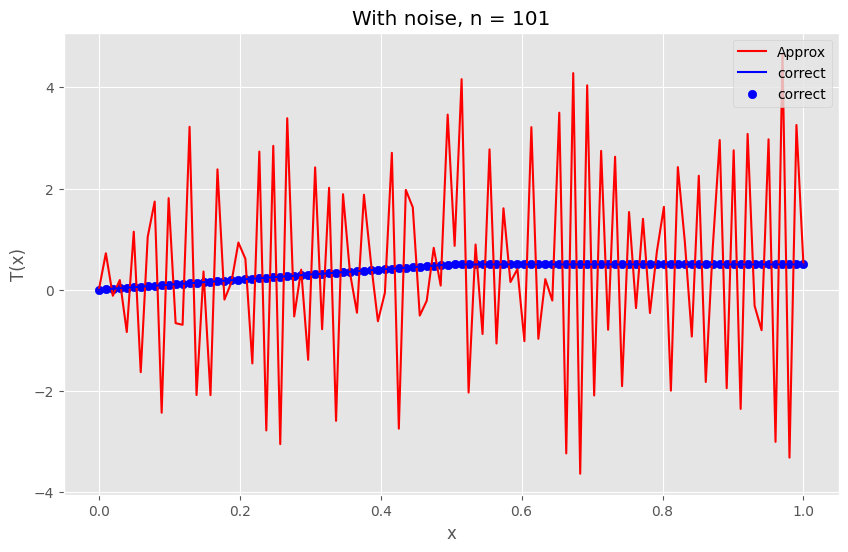

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(x, f_pred, color="red", label="Approx")
plt.plot(x, f_exact, color="blue", label="correct")
plt.scatter(x, f_exact, color="blue", label="correct")

plt.title(f"With noise, n = {n}")
plt.xlabel("x")
plt.ylabel("T(x)")

plt.legend(loc='upper right')

plt.show()

3. Регуляризация Тихонова
$$
\left(\alpha D^* D + I\right)f_\epsilon = D u_\epsilon
$$
$$
\left(\alpha D + I\right)^2 f_\epsilon = D u_\epsilon
$$

In [64]:
# def k(x):
#     return 0.5
# def f(x):
#     return x * (x <= 0.5) + 0.5 * (x > 0.5)
# def u(x):
#     return (- x ** 3 / 3. + 1. / 3. * x) * (x <= 0.5) + (- x ** 2 / 2. + 1. / 2. * x) * (x > 0.5) 

# n = 5
# a = 0
# b = 1
# h = (b - a) / n
# eps = 1e-3
# x = np.linspace(a, b, n + 1)
# np.random.seed(0)
# delta = np.random.uniform(0, 1, n + 1)
# u_x = u(x) + 0.5 * eps * (delta - 0.5)
# print("u_x: ", u_x)
# f_pred = np.zeros(n + 1)
# alpha = 1e-4

# D = np.zeros([n + 1, n + 1])
# D[0, 0] = 1
# for i in range(1, n):
#     D[i, i - 1] = -k(x[i] - h / 2) / h ** 2
#     D[i, i] = (k(x[i] - h / 2) + k(x[i] + h / 2)) / h ** 2
#     D[i, i + 1] = -k(x[i] + h / 2) / h ** 2
# # D[n, n] = 1
# D[n, n - 1] = 1/h
# D[n, n] = -1/h
# if n < 6:
#     print("D: ", D)


# A = (alpha * D + np.diag(np.ones_like(x))) 
# if n < 6:
#     print("A: ", A)
# A = A @ A
# if n < 6:
#     print("D @ u_x: ", D @ u_x)
# f_pred = np.linalg.solve(A, D @ u_x)
# f_pred[-1] = 0.5

# f_exact = f(x)
# print("L_inf error: ", np.abs(f_pred - f_exact).max())
# # print(f"||delta||_2 = {np.sqrt(((0.5 * eps * (delta - 0.5)) ** 2).sum()):.1e}")

In [79]:
def k(x):
    return 0.5
def f(x):
    return x * (x <= 0.5) + 0.5 * (x > 0.5)
# c4 = -0.04
c4 = -0.04
c3 = 0.25
def u(x):
    #return (-x**3 / 3 + 6/8*x + 1/24) * (x <= 0.5) + (-x**2 / 2 + x ) * (x > 0.5)
    #return (-x**3 / 3 + x / 3 +1/24*(1-x)) * (x <= 0.5) + (-x**2 / 2 + x / 2 + x/24) * (x > 0.5)
    return (-x**3 / 3 + 2*(-1/8 + c3)*x + 1/24 + c4) * (x <= 0.5) + (-x**2 / 2 + 2*c3*x + c4) * (x > 0.5)
n = 1000
a = 0
b = 1
h = (b - a) / n
eps = 1e-5
x = np.linspace(a, b, n + 1)
delta = np.random.uniform(0, 1, n + 1)
u_x = u(x) + 0.5 * eps * (delta - 0.5)
#print("u_x: ", u_x)

f_pred = np.zeros(n + 1)
alpha = 0.5e-3


# Правая часть

D = np.zeros([n + 1, n + 1])
D[0, 0] = 1
for i in range(1, n):
    D[i, i - 1] = -k(x[i] - h / 2) / h ** 2
    D[i, i] = (k(x[i] - h / 2) + k(x[i] + h / 2)) / h ** 2
    D[i, i + 1] = -k(x[i] + h / 2) / h ** 2
D[n, n - 1] = 1/h
D[n, n] = -1/h
if n < 6:
    print("D: ", D)


A = (alpha * D + np.eye(n + 1))
if n < 6:
    print("A: ", A)
A = A @ A
if n < 6:
    print("D @ u_x: ", D @ u_x)
f_scheme = np.linalg.solve(A, D @ u_x)

f_exact = f(x)
print("L_inf error: ", np.abs(f_scheme - f_exact).max())

L_inf error:  0.012050886339378952


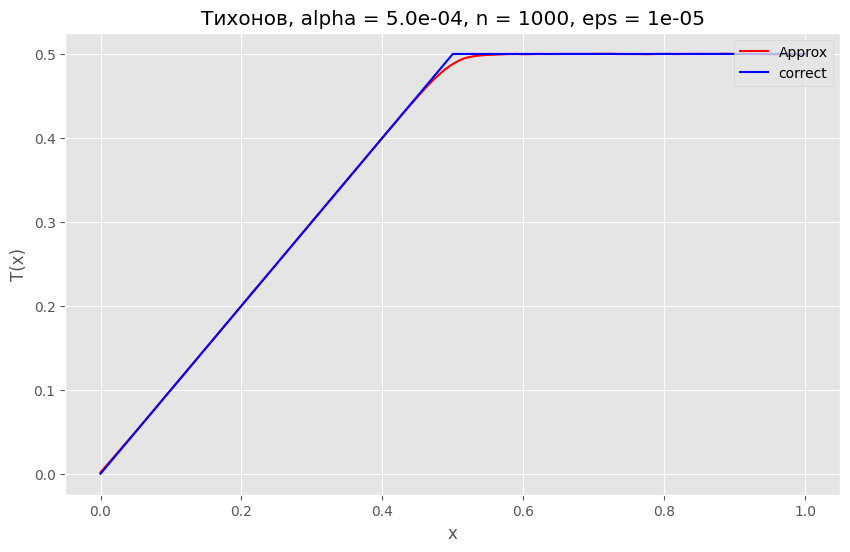

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(x, f_scheme, color="red", label="Approx")
plt.plot(x, f_exact, color="blue", label="correct")

plt.title(f"Тихонов, alpha = {alpha:.1e}, n = {n}, eps = {eps}")
plt.xlabel("x")
plt.ylabel("T(x)")

plt.legend(loc='upper right')

plt.show()